# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [4]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling



In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [6]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [13]:
# Add model training in here!
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', bootstrap = True, random_state = 42,class_weight = 'balanced') # Add parameters to the model!
model.fit(X_train, y_train) # Complete this method call!

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [14]:
feature_importance = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
print(importance_df.sort_values(by="Importance", ascending=False))

                               Feature  Importance
0                             cons_12m    0.055343
11                margin_gross_pow_ele    0.051728
12                  margin_net_pow_ele    0.051682
5              forecast_meter_rent_12m    0.050099
14                          net_margin    0.047031
..                                 ...         ...
45  off_peak_peak_fix_max_monthly_diff    0.003283
29               var_6m_price_peak_fix    0.001877
30           var_6m_price_mid_peak_fix    0.001846
46  peak_mid_peak_fix_max_monthly_diff    0.000965
4             forecast_discount_energy    0.000890

[61 rows x 2 columns]


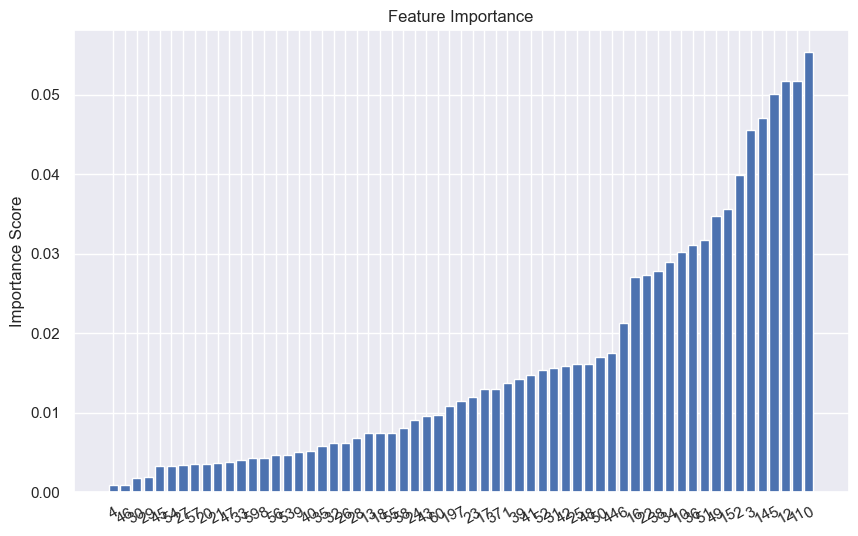

In [19]:
# Plot the importance
sorted_idx = importance_df["Importance"].argsort()
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(range(len(feature_importance)), sorted_idx,rotation = 30)
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.show()

Based on the importance of each features as above, we can delete some of the less importances feature to make the model faster.

In [20]:
threshold = 0.01
mask = importance_df["Importance"] > threshold
features = importance_df[mask]["Feature"]
X_train_selected = X_train[features]
X_test_selected = X_test[features]


In [21]:
# We retrain the model now with the selected features
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', bootstrap = True, random_state = 42,class_weight = 'balanced') # Add parameters to the model!
model.fit(X_train_selected, y_train) 

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [27]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_auc_score, recall_score, f1_score
y_pred = model.predict(X_test_selected)
y_pred_proba = model.predict_proba(X_test_selected)[:,1]
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print("AUC", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix", confusion_matrix(y_test, y_pred))

Accuracy 0.9052573932092004
Precision 0.8846153846153846
Recall 0.06284153005464481
F1 Score 0.11734693877551021
AUC 0.6639606178222562
Confusion Matrix [[3283    3]
 [ 343   23]]


In [28]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X[features], y, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", cv_scores.mean())

Cross-validated Accuracy: 0.9093523473836818


Although the cross validated accuracy is only slightly higher than the model's accuracy, which means we have a stable model that can perform well with unseen data, we can see that the model has extremely low recall, which means we are missing a lot of fasle negative value. To address this, we will use the gridsearch to find the best possible output.

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

grid = {
    'n_estimators': [100, 200, 300,1000],
    'max_depth': [5, 10, 15,30],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],  # Min samples required to split
    'min_samples_leaf': [1, 2, 4],  # Min samples required to be at a leaf node
    'max_features': [ 'sqrt', 'log2'],  # Max features to consider at split
}
grid_search = GridSearchCV(estimator= model, param_grid =grid, n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(X[features], y)
print("Best Parameters",grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [30]:
best_model.fit(X_train_selected, y_train)
y_pred = best_model.predict(X_test_selected)
y_pred_proba = best_model.predict_proba(X_test_selected)[:,1]
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print("AUC", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix", confusion_matrix(y_test, y_pred))


Accuracy 0.9041621029572837
Precision 0.8333333333333334
Recall 0.0546448087431694
F1 Score 0.10256410256410256
AUC 0.671499223398488
Confusion Matrix [[3282    4]
 [ 346   20]]


In [32]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

grid = {
    'n_estimators': [100,1000],
    'max_depth': [5, 10],
    'criterion': ['entropy'],
    'min_samples_split': [2, 5],  # Min samples required to split
    'min_samples_leaf': [1, 2,],  # Min samples required to be at a leaf node
    
}
grid_search = GridSearchCV(estimator= model, param_grid =grid, n_jobs=-1, cv=5, scoring='recall')
grid_search.fit(X[features], y)
print("Best Parameters",grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [33]:
best_model.fit(X_train_selected, y_train)
y_pred = best_model.predict(X_test_selected)
y_pred_proba = best_model.predict_proba(X_test_selected)[:,1]
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred))
print("AUC", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix", confusion_matrix(y_test, y_pred))

Accuracy 0.9011500547645126
Precision 1.0
Recall 0.01366120218579235
F1 Score 0.026954177897574125
AUC 0.6742705433549852
Confusion Matrix [[3286    0]
 [ 361    5]]


After using gridsearch, the value of recall is still too low, we will have to change the threshold for positive value to address this problem

In [38]:
thresholds = np.linspace(0.1, 0.9, 9)

# Evaluate recall for each threshold
recalls = []
for threshold in thresholds:
    y_pred = (y_pred_proba > threshold).astype(int)  # Predict based on the threshold
    recall = f1_score(y_test, y_pred)
    recalls.append(recall)

# Find the best threshold
best_threshold = thresholds[np.argmax(recalls)]
print(f"Best threshold: {best_threshold}")
print(f"Best recall: {max(recalls)}")

Best threshold: 0.2
Best recall: 0.27197346600331673


Opinion on the Current Random Forest Model:

After evaluating the Random Forest Classifier, I believe that while the model shows some strengths, such as high precision and accuracy, it still needs significant improvement in recall and F1 score, especially when dealing with imbalanced classes. Here’s a breakdown of my thoughts:

Precision and Accuracy: The model achieves excellent precision (1.0) and a high accuracy rate of 90.11%. On the surface, this seems like a strong result. However, precision is a misleading metric in this case, as it’s a result of the model failing to predict the positive class (the minority class). This could be due to the model heavily favoring the majority class.

Recall: The recall is alarmingly low at 1.37%, which means that almost all positive instances are being missed. This is a major issue because, in many real-world applications, failing to capture the positive class can have serious consequences (e.g., fraud detection, disease prediction).

F1 Score: The low recall results in a very low F1 score (0.027), reflecting the imbalance between precision and recall. This indicates that while the model is highly confident in its negative class predictions, it's not performing well when it comes to predicting the minority class.

AUC: The AUC of 0.67 suggests that the model has some ability to distinguish between the positive and negative classes, but it still has room for improvement.

Confusion Matrix: The confusion matrix shows that the model is predominantly predicting the negative class (with 3286 TN and 0 FP), but it only correctly predicts 5 positive cases out of 366 actual positives. This imbalance reinforces the need for improvement in recall.



Best Threshold (0.2): Lowering the threshold to 0.2 has allowed the model to classify more instances as positive. This adjustment helps in improving recall since more positive instances are being captured by the model, but this comes at the cost of precision (which is a trade-off when working with imbalanced data).

Recall (0.27): The recall has significantly improved to 27.2%, which is a step in the right direction. While it's still not a great result, it's definitely a major improvement over the original 1.37%. Increasing recall is important because it indicates the model is capturing more of the true positives, which is critical for real-world applications where missing a positive instance can be costly (e.g., fraud detection, medical diagnoses).

F1 Score: If this recall improvement leads to a better F1 score, it suggests that the model is starting to balance precision and recall more effectively. The F1 score would now be more meaningful in the context of this adjustment.

Precision Trade-off: Since precision typically decreases when we lower the threshold, it’s important to monitor the precision-recall trade-off. The model may now have more false positives, which should be balanced by how critical it is to capture those positives in your particular problem.

